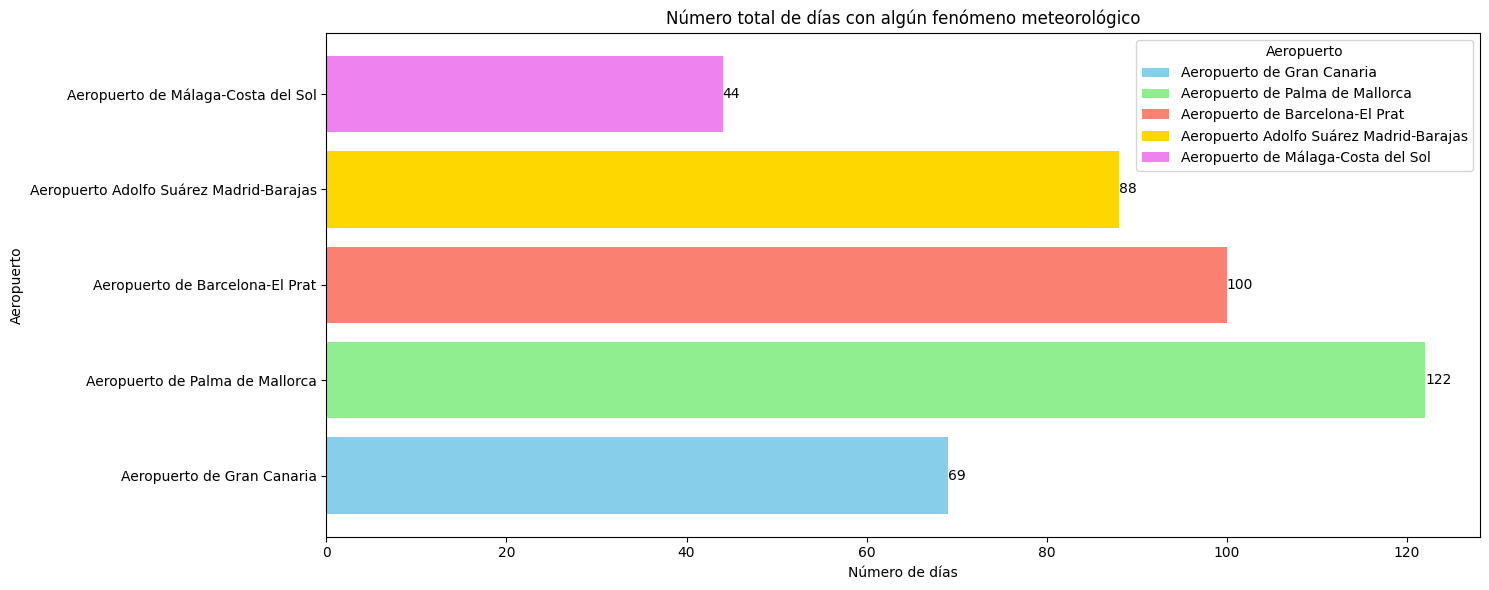

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Nombres de los archivos y aeropuertos con nombres completos para la leyenda
files = {
    'GCLP': 'GCLP_All.csv',
    'LEPA': 'LEPA_All.csv',
    'LEBL': 'LEBL_All.csv',
    'LEMD': 'LEMD_All.csv',
    'LEMG': 'LEMG_All.csv'
}

airport_names = {
    'GCLP': 'Aeropuerto de Gran Canaria',
    'LEPA': 'Aeropuerto de Palma de Mallorca',
    'LEBL': 'Aeropuerto de Barcelona-El Prat',
    'LEMD': 'Aeropuerto Adolfo Suárez Madrid-Barajas',
    'LEMG': 'Aeropuerto de Málaga-Costa del Sol'
}

# Colores para cada aeropuerto
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet']

# Lista para almacenar el conteo de días con fenómenos por aeropuerto
phenomena_days = []

# Iterar sobre cada archivo
for airport_code, file_name in files.items():
    # Cargar los datos
    data = pd.read_csv(file_name, low_memory=False)
    
    # Convertir la columna dateTime a tipo datetime para extraer la fecha (sin tiempo)
    data['dateTime'] = pd.to_datetime(data['dateTime']).dt.date
    
    # Agrupar por fecha y fenómeno, contando las ocurrencias diarias de cada fenómeno
    if 'phenomenon1' in data.columns:
        daily_phenomena = data.groupby(['dateTime', 'phenomenon1']).size().reset_index(name='counts')
        
        # Agrupar por fecha para contar cuántos días distintos tuvieron algún tipo de fenómeno
        phenomenon_days_count = daily_phenomena['dateTime'].nunique()
    else:
        phenomenon_days_count = 0  # Si no hay datos de fenómenos en algunos archivos
    
    # Añadir al resultado
    phenomena_days.append(phenomenon_days_count)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(15, 6))
bars = plt.barh(list(airport_names.values()), phenomena_days, color=colors)
plt.title('Número total de días con algún fenómeno meteorológico')
plt.xlabel('Número de días')
plt.ylabel('Aeropuerto')

# Añadir etiquetas a cada barra
for bar, value in zip(bars, phenomena_days):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(value)}',
             ha='left', va='center', color='black')

# Crear la leyenda
plt.legend(bars, list(airport_names.values()), title="Aeropuerto", loc='upper right')

plt.tight_layout()
plt.show()
